# Análisis Exploratorio de Datos (EDA) del Dataset Titanic

Este notebook está diseñado como guia a través de un análisis exploratorio de datos completo utilizando el dataset **"Titanic - Machine Learning from Disaster"** de Kaggle. Realizaremos un análisis detallado desde la comprensión inicial de los datos hasta la extracción de insights y generación de hipótesis. Utilizaremos bibliotecas populares como **Pandas**, **NumPy**, **Matplotlib**, **Seaborn** y **Scikit-learn**.


## **Índice**

1. [Configuración del Entorno](#1)
2. [EDA Level 0 — Comprensión de los Datos Originales](#2)
   - 2.1 [Carga de Datos](#2.1)
   - 2.2 [Inspección Inicial](#2.2)
   - 2.3 [Visualizaciones Básicas](#2.3)
3. [EDA Level 1 — Transformación de los Datos Originales](#3)
   - 3.1 [Limpieza de Datos](#3.1)
   - 3.2 [Manejo de Valores Atípicos (Outliers)](#3.2)
   - 3.3 [Transformaciones y Normalización](#3.3)
   - 3.4 [Ingeniería de Características](#3.4)
4. [EDA Level 2 — Comprensión de los Datos Transformados](#4)
   - 4.1 [Análisis Estadístico Descriptivo](#4.1)
   - 4.2 [Análisis Bivariado y Multivariado](#4.2)
   - 4.3 [Visualizaciones Avanzadas](#4.3)
5. [EDA Level 3 — Selección de Características y Reducción de Dimensionalidad](#5)
   - 5.1 [Selección de Características](#5.1)
   - 5.2 [Análisis de Componentes Principales (PCA)](#5.2)
6. [EDA Level 4 — Insights y Generación de Hipótesis](#6)
   - 6.1 [Identificación de Patrones Clave](#6.1)
   - 6.2 [Generación de Hipótesis](#6.2)
7. [Conclusiones](#7)

<a id="1"></a>
## 1. Configuración del Entorno

1. **Importar bibliotecas básicas**:
   - ***numpy*** y ***pandas*** son bibliotecas fundamentales para la manipulación y análisis de datos en Python.
   - ***sys*** y ***os*** se utilizan para manipular rutas del sistema y agregar directorios al sys.path, permitiendo la importación de módulos desde ubicaciones específicas.

2. **Importar funciones personalizadas**:
   - Se agrega un directorio al ***sys.path*** para permitir la importación de funciones desde un archivo específico (***data_summary.py***) ubicado en un directorio superior (***../utils***).
   - Se importan las funciones ***column_summary*** y ***column_summary_plus*** desde el módulo eda.

3. **Para visualización**:
   - ***matplotlib.pyplot*** y ***seaborn*** son bibliotecas utilizadas para la visualización de datos.
   - ***%matplotlib*** inline es un comando mágico de Jupyter que permite que las gráficas se muestren directamente en el notebook.

4. **Configuraciones adicionales**:
   - Se establece el estilo de las gráficas de ***matplotlib*** a ***ggplotlot***.
   - Se configura ***seaborn*** para usar un tema de cuadrícula blanca.

5. **Ignorar advertencias**:
    - Se importa el módulo ***warnings*** y se configuran para ignorar todas las advertencias, lo que puede ser útil para evitar mensajes de advertencia innecesarios durante el análisis.

In [85]:
# Comandos de instalación sugeridos
!pip install --upgrade pip
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/d4/55/90db48d85f7689ec6f81c0db0622d704306c5284850383c090e6c7195a5c/pip-24.2-py3-none-any.whl.metadata
  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1


In [86]:
# Importar bibliotecas básicas
import numpy as np
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath('../utils'))
# Ahora puedes importar la función del archivo `data_summary.py`
from eda import column_summary,column_summary_plus

# Para visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Configuraciones adicionales
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
## 2. EDA Level 0 — Comprensión de los Datos Originales

### Objetivos:
- Cargar los datos en bruto.
- Entender el tamaño, tipos de datos, valores nulos y duplicados.
- Visualizaciones básicas de la estructura de los datos.

<a id="2.1"></a>
### 2.1 Carga de Datos

1. **Cargar datos desde archivos CSV**:
    - `train_df = pd.read_csv('dataset/train.csv')`: Carga los datos de entrenamiento desde el archivo `train.csv` y los almacena en el DataFrame `train_df`.
    - `test_df = pd.read_csv('dataset/test.csv')`: Carga los datos de prueba desde el archivo `test.csv` y los almacena en el DataFrame `test_df`.

2. **Verificar si los datos se cargaron correctamente**:
    - `print("Datos de Entrenamiento")`: Imprime un mensaje indicando que se mostrarán los datos de entrenamiento.
    - `train_df.head()`: Muestra las primeras filas del DataFrame `train_df` para verificar que los datos se hayan cargado correctamente.

In [87]:
# Cargar datos desde archivos CSV
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

# Verificar si los datos se cargaron correctamente
print("Datos de Entrenamiento")
train_df.head()


Datos de Entrenamiento


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
# Verificar si los datos de test se cargaron correctamente
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<a id="2.2"></a>
### 2.2 Inspección Inicial

1. **Dimensiones del dataset**:
    - `print("Dimensiones del dataset de entrenamiento:", train_df.shape)`: Imprime las dimensiones (número de filas y columnas) del DataFrame `train_df`.

2. **Información sobre los tipos de datos**:
    - `print("Información", train_df.info())`: Imprime información sobre los tipos de datos de cada columna en el DataFrame `train_df`, así como el número de valores no nulos.

3. **Estadísticas descriptivas básicas**:
    - `print("Descripción", train_df.describe())`: Imprime estadísticas descriptivas básicas (como la media, la desviación estándar, los valores mínimos y máximos, etc.) para las columnas numéricas del DataFrame `train_df`.

4. **Dimensiones de los datos de entrenamiento**:
    - `print("Dimensiones de los datos de entrenamiento", train_df.shape)`: Imprime nuevamente las dimensiones (número de filas y columnas) del DataFrame `train_df`.

In [89]:
# Dimensiones del dataset
print("Dimensiones del dataset de entrenamiento:", train_df.shape)

# Información sobre los tipos de datos
print("Información",train_df.info())

# Estadísticas descriptivas básicas
print("Descripción",train_df.describe())

# Dimensiones de los datos de entrenamiento
print("Dimensiones de los datos de entrenamiento",train_df.shape)


Dimensiones del dataset de entrenamiento: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Información None
Descripción        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0

In [90]:
column_summary_plus(train_df)

Processing column: PassengerId (dtype: int64)
Processing column: Survived (dtype: int64)
Processing column: Pclass (dtype: int64)
Processing column: Name (dtype: object)
Processing column: Sex (dtype: object)
Processing column: Age (dtype: float64)
Processing column: SibSp (dtype: int64)
Processing column: Parch (dtype: int64)
Processing column: Ticket (dtype: object)
Processing column: Fare (dtype: float64)
Processing column: Cabin (dtype: object)
Processing column: Embarked (dtype: object)


,col_name,col_dtype,num_distinct_values,min_value,max_value,median_no_na,average_no_na,average_non_zero,null_present,nulls_num,non_nulls_num,distinct_values
0,PassengerId,int64,891,1.00,891.0000,446.0000,446.000000,446.000000,False,0,891,"{1: 1, 599: 1, 588: 1, 589: 1, 590: 1, 591: 1,..."
1,Survived,int64,2,0.00,1.0000,0.0000,0.383838,1.000000,False,0,891,"{0: 549, 1: 342}"
2,Pclass,int64,3,1.00,3.0000,3.0000,2.308642,2.308642,False,0,891,"{3: 491, 1: 216, 2: 184}"
3,Name,object,891,NaN,NaN,NaN,NaN,NaN,False,0,891,"{'Braund, Mr. Owen Harris': 1, 'Boulos, Mr. Ha..."
4,Sex,object,2,NaN,NaN,NaN,NaN,NaN,False,0,891,"{'male': 577, 'female': 314}"
5,Age,float64,88,0.42,80.0000,28.0000,29.699118,29.699118,True,177,714,"{24.0: 30, 22.0: 27, 18.0: 26, 19.0: 25, 28.0:..."
6,SibSp,int64,7,0.00,8.0000,0.0000,0.523008,1.646643,False,0,891,"{0: 608, 1: 209, 2: 28, 4: 18, 3: 16, 8: 7, 5: 5}"
7,Parch,int64,7,0.00,6.0000,0.0000,0.381594,1.596244,False,0,891,"{0: 678, 1: 118, 2: 80, 5: 5, 3: 5, 4: 4, 6: 1}"
8,Ticket,object,681,NaN,NaN,NaN,NaN,NaN,False,0,891,"{'347082': 7, 'CA. 2343': 7, '1601': 7, '31012..."
9,Fare,float64,248,0.00,512.3292,14.4542,32.204208,32.755650,False,0,891,"{8.05: 43, 13.0: 42, 7.8958: 38, 7.75: 34, 26...."


- **Comprobar valores nulos**:
  
`train_df.isnull().sum()`: Calcula el número de valores nulos en cada columna del DataFrame `train_df`. La función `isnull()` devuelve un DataFrame del mismo tamaño con valores booleanos (`True` para valores nulos y `False` para valores no nulos). Luego, `sum()` se aplica a lo largo de cada columna para contar el número de valores nulos.

In [91]:
# Comprobar valores nulos
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- **Contar duplicados**:

`print("Número de filas duplicadas:", train_df.duplicated().sum())`: Imprime el número de filas duplicadas en el DataFrame `train_df`. La función `duplicated()` devuelve una serie booleana que indica si una fila es duplicada (`True`) o no (`False`). Luego, `sum()` se aplica para contar el número de `True`, es decir, el número de filas duplicadas.

In [92]:
# Contar duplicados
print("Número de filas duplicadas:", train_df.duplicated().sum())

Número de filas duplicadas: 0


<a id="2.3"></a>
### 2.3 Visualizaciones Básicas

- **Conteo de supervivientes y no supervivientes**:
    - `plt.figure(figsize=(8,6))`: Crea una nueva figura con un tamaño de 8x6 pulgadas para la visualización.
    - `sns.countplot(x='Survived', data=train_df)`: Utiliza `seaborn` para crear un gráfico de barras que muestra el conteo de supervivientes (`Survived`) en el DataFrame `train_df`. La columna `Survived` contiene valores binarios (0 = No sobrevivió, 1 = Sí sobrevivió).
    - `plt.title('Distribución de Supervivientes')`: Establece el título del gráfico como "Distribución de Supervivientes".
    - `plt.xlabel('Survived (0 = No, 1 = Sí)')`: Etiqueta el eje x como "Survived (0 = No, 1 = Sí)".
    - `plt.ylabel('Count')`: Etiqueta el eje y como "Count".
    - `plt.show()`: Muestra el gráfico.

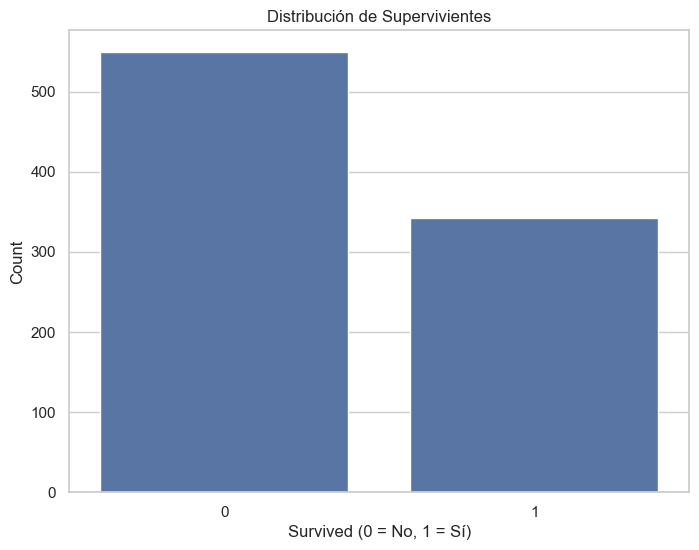

In [93]:
# Conteo de supervivientes y no supervivientes
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=train_df)
plt.title('Distribución de Supervivientes')
plt.xlabel('Survived (0 = No, 1 = Sí)')
plt.ylabel('Count')
plt.show()

- **Histograma de la edad**:
    - `plt.figure(figsize=(10,6))`: Crea una nueva figura con un tamaño de 10x6 pulgadas para la visualización.
    - `sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)`: Utiliza `seaborn` para crear un histograma de la columna `Age` del DataFrame `train_df`. La función `dropna()` se utiliza para eliminar los valores nulos. El parámetro `kde=True` añade una estimación de densidad kernel al histograma, y `bins=30` especifica el número de bins en el histograma.
    - `plt.title('Distribución de la Edad')`: Establece el título del gráfico como "Distribución de la Edad".
    - `plt.xlabel('Age')`: Etiqueta el eje x como "Age".
    - `plt.ylabel('Frequency')`: Etiqueta el eje y como "Frequency".
    - `plt.show()`: Muestra el gráfico.

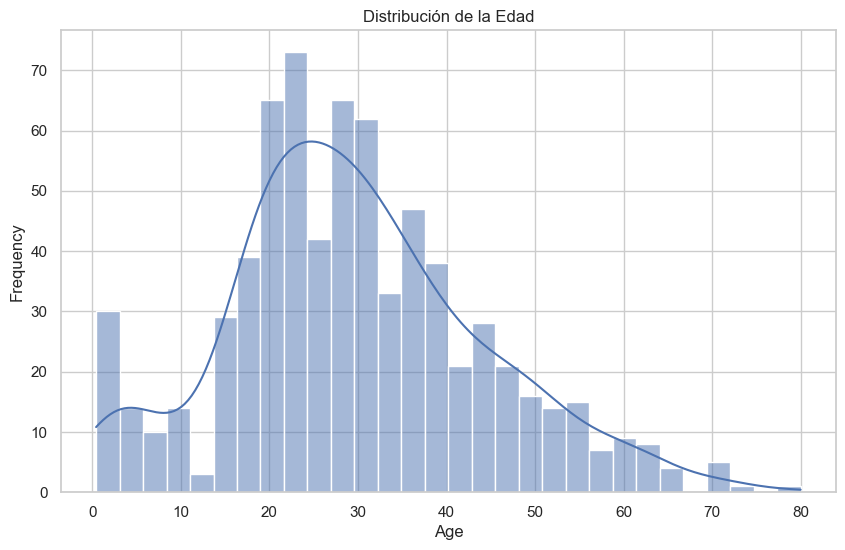

In [94]:
# Histograma de la edad
plt.figure(figsize=(10,6))
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribución de la Edad')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- **Gráfico de barras para la clase de pasajero**:
    - `plt.figure(figsize=(8,6))`: Crea una nueva figura con un tamaño de 8x6 pulgadas para la visualización.
    - `sns.countplot(x='Pclass', data=train_df)`: Utiliza `seaborn` para crear un gráfico de barras que muestra el conteo de pasajeros en cada clase (`Pclass`) en el DataFrame `train_df`. La columna `Pclass` contiene valores que representan las clases de los pasajeros (1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase).
    - `plt.title('Distribución de Clases de Pasajeros')`: Establece el título del gráfico como "Distribución de Clases de Pasajeros".
    - `plt.xlabel('Pclass (1 = Primera, 2 = Segunda, 3 = Tercera)')`: Etiqueta el eje x como "Pclass (1 = Primera, 2 = Segunda, 3 = Tercera)".
    - `plt.ylabel('Count')`: Etiqueta el eje y como "Count".
    - `plt.show()`: Muestra el gráfico.

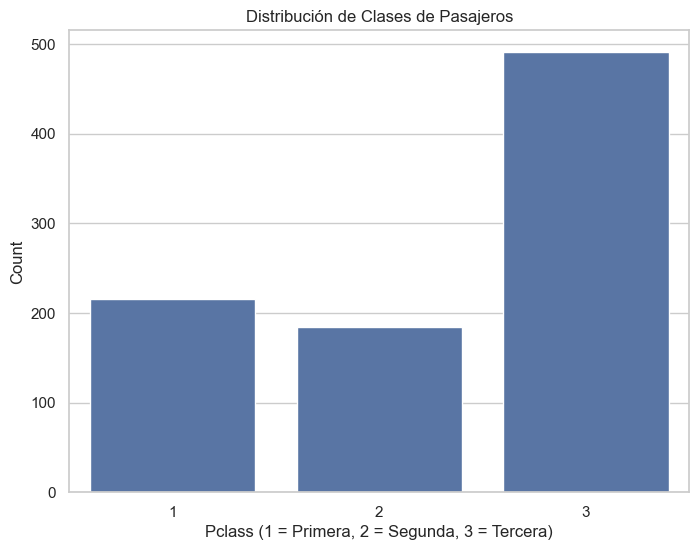

In [95]:
# Gráfico de barras para la clase de pasajero
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', data=train_df)
plt.title('Distribución de Clases de Pasajeros')
plt.xlabel('Pclass (1 = Primera, 2 = Segunda, 3 = Tercera)')
plt.ylabel('Count')
plt.show()

<a id="3"></a>
## 3. EDA Level 1 — Transformación de los Datos Originales

### Objetivos:
- Limpieza de datos y manejo de outliers.
- Transformaciones necesarias (escalado, normalización, imputación de valores faltantes).
- Aplicación de ingeniería de características.

<a id="3.1"></a>
### 3.1 Limpieza de Datos

- **Manejo de valores nulos**

In [96]:
# Verificar valores nulos por columna
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- **Imputación de valores faltantes en 'Age'**

Para imputar los valores nulos en la columna "Age", primero extraeremos el título social de cada persona de la columna "Name". Luego, realizaremos la imputación de los valores faltantes en la columna "Age" del DataFrame **train_df** mediante el uso de interpolación lineal y, en algunos casos, la media. Este proceso se lleva a cabo agrupando los datos según el título social de las personas (como "Mr", "Miss", "Mrs", "Master", etc.), imputando los valores de manera específica para cada grupo de personas con el mismo título.

In [97]:
# Función para extraer el título de un nombre
def extract_title(name):
    return name.split(",")[1].split(".")[0].strip()

# Aplicar la función a ambos DataFrames
train_df["Title"] = train_df["Name"].apply(extract_title)
test_df["Title"] = test_df["Name"].apply(extract_title)
print(train_df["Title"].value_counts())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


*Análisis de los títulos* (Posiblemente):

- **Mr (517 registros)**: Título utilizado para hombres adultos. Indica que el pasajero es un hombre mayor de edad.
- **Miss (182 registros)**: Se refiere a mujeres solteras, generalmente jóvenes. Puede incluir desde niñas hasta mujeres adultas solteras.
- **Mrs (125 registros)**: Título para mujeres casadas. Indica que el pasajero es una mujer adulta.
- **Master (40 registros)**: Título utilizado para niños varones. Generalmente menores de 12 a 14 años.
- **Dr (7 registros)**: Indica que el pasajero tiene un título de doctorado. Probablemente adulto, puede ser hombre o mujer, aunque históricamente es más probable que sea hombre.
- **Rev (6 registros)**: Abreviatura de "Reverendo". Indica que el pasajero es un clérigo masculino adulto.
- **Mlle (2 registros)**: Abreviatura de "Mademoiselle", equivalente francés de "Miss". Mujer joven o soltera.
- **Mme (1 registro)**: Abreviatura de "Madame", equivalente francés de "Mrs". Mujer casada.
- **Ms (1 registro)**: Título femenino que puede referirse a una mujer independientemente de su estado civil. Sin embargo, en la época del Titanic, este título no era común, por lo que podría ser un error o variación de "Miss" o "Mrs".
- **Major (2 registros)**: Rango militar. Indica que el pasajero es un hombre adulto con rango de oficial.
- **Col (2 registros)**: Abreviatura de "Coronel". Rango militar alto, hombre adulto.
- **Capt (1 registro)**: Abreviatura de "Capitán". Puede referirse a un rango militar o marítimo. Hombre adulto.
- **Sir (1 registro)**: Título nobiliario británico. Indica un hombre de estatus social elevado.
- **Lady (1 registro)**: Título nobiliario femenino. Indica una mujer de estatus social elevado.
- **the Countess (1 registro)**: "La Condesa". Título nobiliario femenino de alto rango.
- **Don (1 registro)**: Título español de respeto, generalmente para hombres mayores o de alta posición social.
- **Jonkheer (1 registro)**: Título nobiliario neerlandés. Hombre de la nobleza.

**Relación con la edad**:

- **Master**: Generalmente niños varones menores de 12 a 14 años.
- **Miss/Mlle**: Pueden ser niñas o mujeres jóvenes solteras. La edad puede variar desde la infancia hasta la edad adulta temprana.
- **Mrs/Mme**: Mujeres adultas casadas, generalmente mayores de 18 años.
- **Mr**: Hombres adultos mayores de 18 años.
- **Títulos militares (Capt, Col, Major)**: Hombres adultos, probablemente de mediana edad debido al rango alcanzado.
- **Títulos nobiliarios (Sir, Lady, the Countess, Don, Jonkheer)**: Adultos de alto estatus social, la edad puede variar pero generalmente adultos maduros.

In [98]:
import pandas as pd

def interpolate_age(df):
    """
    Interpola los valores faltantes de la columna 'Age' en el DataFrame basado en el título ('Title').

    Parameters:
    df (pd.DataFrame): DataFrame a procesar.

    Returns:
    pd.DataFrame: DataFrame con los valores de 'Age' interpolados.
    """
    titles = {
        "Master": ["Master"],
        "Miss_Mlle": ["Miss", "Mlle"],
        "Mrs_Mme": ["Mrs", "Mme"],
        "Mr": ["Mr"],
        "Cap_Col_Major": ["Cap", "Col", "Major"],
        "Otros": ["Sir", "Lady", "the Countess", "Don", "Jonkheer"]
    }

    df_list = []
    for key, title_list in titles.items():
        df_subset = df[df["Title"].isin(title_list)].copy()
        df_subset["Age"] = df_subset["Age"].interpolate(method="linear")
        df_list.append(df_subset)

    return pd.concat(df_list, ignore_index=True)

# Rellenar valores faltantes de edad en el dataset de train_df
train_df = interpolate_age(train_df)

# Rellenar valores faltantes de edad en el dataset de test_df
test_df = interpolate_age(test_df)

print(train_df["Title"].value_counts())
print(train_df.isnull().sum())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Mlle              2
Major             2
Col               2
Mme               1
Don               1
Lady              1
Sir               1
the Countess      1
Jonkheer          1
Name: count, dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          676
Embarked         2
Title            0
dtype: int64


- **Imputación de valores faltantes en la columna 'Embarked'**:
    - `train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)`: Este código imputa (rellena) los valores faltantes en la columna `Embarked` del DataFrame `train_df` con el valor más frecuente (moda) de esa columna.
        - `train_df['Embarked']`: Selecciona la columna `Embarked` del DataFrame `train_df`.
        - `fillna()`: Método utilizado para rellenar los valores faltantes (`NaN`).
        - `train_df['Embarked'].mode()[0]`: Calcula la moda (valor más frecuente) de la columna `Embarked` y selecciona el primer valor de la moda.
        - `inplace=True`: Modifica el DataFrame `train_df` en su lugar, sin necesidad de asignar el resultado a una nueva variable.

In [99]:
# Imputación de 'Embarked' con el valor más frecuente
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

- **Eliminar la columna 'Cabin'**:
    - `train_df.drop('Cabin', axis=1, inplace=True)`: Elimina la columna `Cabin` del DataFrame `train_df`.
        - `train_df.drop('Cabin', axis=1)`: Selecciona la columna `Cabin` para eliminarla. El parámetro `axis=1` indica que se está eliminando una columna (en lugar de una fila).
        - `inplace=True`: Modifica el DataFrame `train_df` en su lugar, sin necesidad de asignar el resultado a una nueva variable.
    - `test_df.drop('Cabin', axis=1, inplace=True)`: Elimina la columna `Cabin` del DataFrame `test_df` de manera similar.
        - `test_df.drop('Cabin', axis=1)`: Selecciona la columna `Cabin` para eliminarla. El parámetro `axis=1` indica que se está eliminando una columna (en lugar de una fila).
        - `inplace=True`: Modifica el DataFrame `test_df` en su lugar, sin necesidad de asignar el resultado a una nueva variable.
    - `train_df`: Muestra el DataFrame `train_df` después de eliminar la columna `Cabin`.

In [100]:

# Eliminar la columna 'Cabin'
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master
1,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,Master
2,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,S,Master
3,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,S,Master
4,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S,Master
...,...,...,...,...,...,...,...,...,...,...,...,...
871,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C,Don
872,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,C,Lady
873,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,C,Sir
874,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,S,the Countess


<a id="3.2"></a>
### 3.2 Manejo de Valores Atípicos (Outliers)



<a id="3.3"></a>
### 3.3 Transformaciones y Normalización

- **Estandarización de características numéricas**:
    - `from sklearn.preprocessing import StandardScaler`: Importa la clase `StandardScaler` del módulo `sklearn.preprocessing`.
    - `scaler = StandardScaler()`: Crea una instancia del escalador `StandardScaler`.
    - `numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']`: Define una lista de características numéricas que se van a estandarizar.
    - `scaler.fit(train_df[numerical_features])`: Ajusta el escalador a las características numéricas del conjunto de datos de entrenamiento `train_df`.
        - `train_df[numerical_features]`: Selecciona las columnas `Age`, `SibSp`, `Parch` y `Fare` del DataFrame `train_df`.
        - `fit()`: Calcula la media y la desviación estándar para cada característica en el conjunto de datos de entrenamiento.
    - `train_df[numerical_features] = scaler.transform(train_df[numerical_features])`: Transforma las características numéricas del conjunto de datos de entrenamiento `train_df` utilizando el escalador ajustado.
        - `transform()`: Aplica la transformación de estandarización a las características numéricas.
    - `test_df[numerical_features] = scaler.transform(test_df[numerical_features])`: Transforma las características numéricas del conjunto de datos de prueba `test_df` utilizando el mismo escalador ajustado.
        - `test_df[numerical_features]`: Selecciona las columnas `Age`, `SibSp`, `Parch` y `Fare` del DataFrame `test_df`.
        - `transform()`: Aplica la transformación de estandarización a las características numéricas.

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
# Ajustar el escalador al conjunto de entrenamiento
scaler.fit(train_df[numerical_features])

# Transformar el conjunto de entrenamiento y de prueba
train_df[numerical_features] = scaler.transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

<a id="3.4"></a>
### 3.4 Ingeniería de Características


Esta función realiza varias transformaciones en un DataFrame de pandas. A continuación se detallan los pasos que realiza:

1. **Crear la característica 'FamilySize'**:
   - Calcula el tamaño de la familia sumando el número de hermanos/esposas (`SibSp`) y padres/hijos (`Parch`), y añadiendo 1 (el propio pasajero).
   - Almacena el resultado en una nueva columna llamada `FamilySize`.

2. **Crear la característica 'IsAlone'**:
   - Inicialmente, asume que todos los pasajeros están solos, asignando el valor 1 a la nueva columna `IsAlone`.
   - Si el tamaño de la familia es mayor a 1, actualiza `IsAlone` a 0 (no están solos).

3. **Convertir la característica 'Sex' a un valor numérico**:
   - Convierte los valores de la columna `Sex` a valores numéricos: 'male' se convierte en 1 y 'female' se convierte en 0.
   - Almacena los resultados en una nueva columna llamada `SexNumber` tanto en el DataFrame de entrenamiento (`train_df`) como en el DataFrame de prueba (`test_df`).


In [102]:
# Crear una nueva característica 'FamilySize'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Crear una nueva característica 'IsAlone'
train_df['IsAlone'] = 1  # Inicialmente todos están solos
train_df['IsAlone'].loc[train_df['FamilySize'] > 1] = 0  # Si el tamaño de familia es más de 1, no están solos

train_df['SexNumber'] = train_df['Sex'].replace({'male': 1, 'female': 0})
test_df['SexNumber'] = train_df['Sex'].replace({'male': 1, 'female': 0})

- **Extracción de títulos de los nombres**

Este paso se hizo antes para poder hacer el manejo de las edades que estaban faltantes

- **Codificación categórica**

Convierte variables categóricas en variables numéricas utilizando la técnica de codificación one-hot. A continuación se detallan los pasos que realiza:

1. **Definir las características categóricas**:
   - Se crea una lista llamada `categorical_features` que contiene los nombres de las columnas categóricas que se desean convertir: `['Sex', 'Embarked', 'Title']`.

2. **Convertir las variables categóricas en variables numéricas**:
   - Utiliza la función `pd.get_dummies` de pandas para convertir las columnas categóricas especificadas en `categorical_features` en variables dummy (one-hot encoding).
   - Almacena el resultado en el DataFrame `train_df`, reemplazando las columnas originales con las nuevas columnas dummy.


In [103]:
# Convertir variables categóricas en numéricas
categorical_features = ['Sex', 'Embarked', 'Title']
train_df = pd.get_dummies(train_df, columns=categorical_features)

**Sección: Guardar los DataFrames Preprocesados**

## Descripción del Código

Guarda los DataFrames `train_df` y `test_df` en dos formatos diferentes: CSV y Pickle. A continuación se detallan los pasos que realiza:

1. **Guardar los DataFrames en formato CSV**:
   - Guarda `train_df` en un archivo CSV llamado `train_preprocessed.csv` en la carpeta `preprocessed`.
   - Guarda `test_df` en un archivo CSV llamado `test_preprocessed.csv` en la carpeta `preprocessed`.
   - La opción `index=False` se utiliza para no guardar los índices de los DataFrames en los archivos CSV.

2. **Guardar los DataFrames en formato Pickle**:
   - Guarda `train_df` en un archivo Pickle llamado `train_preprocessed.pkl` en la carpeta `preprocessed`.
   - Guarda `test_df` en un archivo Pickle llamado `test_preprocessed.pkl` en la carpeta `preprocessed`.


In [104]:
# 1. Guardar los DataFrames en CSV
train_df.to_csv('preprocessed/train_preprocessed.csv', index=False)
test_df.to_csv('preprocessed/test_preprocessed.csv', index=False)

# 2. Guardar los DataFrames en formato Pickle
train_df.to_pickle('preprocessed/train_preprocessed.pkl')
test_df.to_pickle('preprocessed/test_preprocessed.pkl')

<a id="4"></a>
## 4. EDA Level 2 — Comprensión de los Datos Transformados

### Objetivos:
- Análisis descriptivo y estadístico post-transformación.
- Correlaciones y análisis multivariante.
- Visualizaciones avanzadas.

<a id="4.1"></a>
### 4.1 Análisis Estadístico Descriptivo

In [105]:
# Estadísticas descriptivas después de la transformación
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,SexNumber
count,876.000000,876.000000,876.000000,8.760000e+02,8.760000e+02,8.760000e+02,8.760000e+02,876.000000,876.000000,876.000000
mean,444.590183,0.385845,2.320776,3.244487e-17,-1.622244e-17,3.244487e-17,-6.488975e-17,1.000000,0.740868,0.643836
std,257.204994,0.487072,0.835540,1.000571e+00,1.000571e+00,1.000571e+00,1.000571e+00,1.684093,0.438409,0.479138
min,1.000000,0.000000,1.000000,-2.118049e+00,-4.741472e-01,-4.760035e-01,-6.443261e-01,0.049849,0.000000,0.000000
25%,221.750000,0.000000,2.000000,-6.215427e-01,-4.741472e-01,-4.760035e-01,-4.860423e-01,0.049849,0.000000,0.000000
50%,445.500000,0.000000,3.000000,-1.125268e-01,-4.741472e-01,-4.760035e-01,-3.545687e-01,0.049849,1.000000,1.000000
75%,667.250000,1.000000,3.000000,6.146388e-01,4.287940e-01,-4.760035e-01,-2.288184e-02,1.283515,1.000000,1.000000
max,891.000000,1.000000,3.000000,3.668734e+00,6.749382e+00,6.925991e+00,9.626128e+00,9.740710,1.000000,1.000000


- **Distribución de 'Age' después de la imputación y normalización**

Se genera un histograma de la distribución de la variable `Age` después de la imputación y normalización, utilizando las bibliotecas `matplotlib` y `seaborn`. A continuación se detallan los pasos que realiza:

1. **Configurar el tamaño de la figura**:
   - Utiliza `plt.figure(figsize=(10,6))` para establecer el tamaño de la figura en 10 pulgadas de ancho y 6 pulgadas de alto.

2. **Generar el histograma**:
   - Utiliza `sns.histplot(train_df['Age'], kde=True)` para crear un histograma de la variable `Age` del DataFrame `train_df`.
   - La opción `kde=True` añade una estimación de densidad kernel (KDE) al histograma para mostrar la distribución de la variable de manera más suave.

3. **Añadir título y etiquetas**:
   - Utiliza `plt.title('Distribución de Age Después de la Imputación y Normalización')` para añadir un título al gráfico.
   - Utiliza `plt.xlabel('Age (normalizado)')` para etiquetar el eje X.
   - Utiliza `plt.ylabel('Frequency')` para etiquetar el eje Y.

4. **Mostrar el gráfico**:
   - Utiliza `plt.show()` para mostrar el gráfico generado.


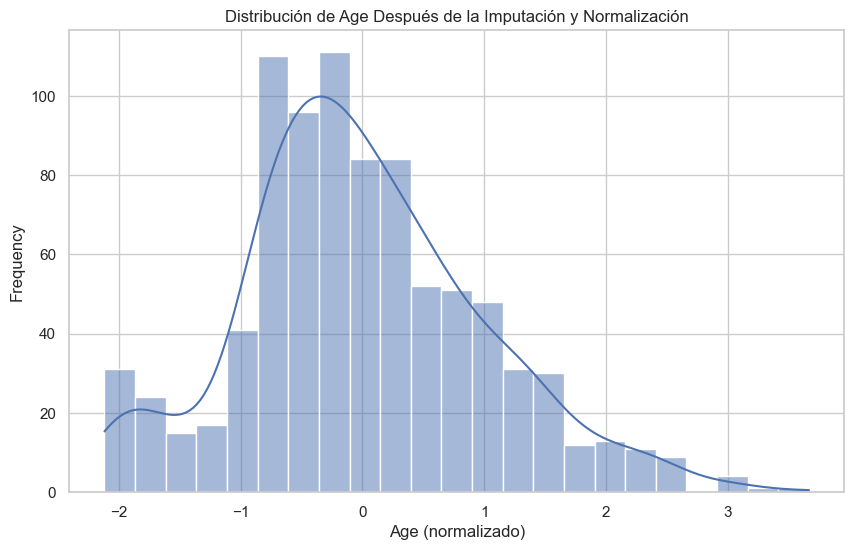

In [106]:
plt.figure(figsize=(10,6))
sns.histplot(train_df['Age'], kde=True)
plt.title('Distribución de Age Después de la Imputación y Normalización')
plt.xlabel('Age (normalizado)')
plt.ylabel('Frequency')
plt.show()

Se genera histogramas para analizar la distribución de varias características en el DataFrame `train_df`. A continuación se detallan los pasos que realiza:

1. **Definir las características a analizar**:
   - Se crea una lista llamada `features` que contiene los nombres de las columnas a analizar: `['Age', 'Fare', 'SibSp', 'Parch']`.

2. **Crear la figura y los ejes**:
   - Utiliza `plt.subplots(2, 2, figsize=(15, 10))` para crear una figura con una cuadrícula de 2x2 subgráficos, y establece el tamaño de la figura en 15 pulgadas de ancho y 10 pulgadas de alto.

3. **Definir una paleta de colores y etiquetas**:
   - Se define una lista de colores `colors` para estandarizar los gráficos.
   - Se definen listas `titles` y `xlabels` para los títulos y etiquetas de los ejes X de los gráficos.

4. **Graficar la distribución para cada característica**:
   - Utiliza un bucle `for` para iterar sobre las características en `features`.
   - Para cada característica, selecciona el subgráfico correspondiente en la cuadrícula.
   - Utiliza `ax.hist` para crear un histograma de la característica actual con 20 bins, un color específico y bordes negros.
   - Establece el título, la etiqueta del eje X y la etiqueta del eje Y para cada subgráfico.

5. **Ajustar el diseño y mostrar el gráfico**:
   - Utiliza `plt.tight_layout()` para ajustar el diseño de los subgráficos y evitar solapamientos.
   - Utiliza `plt.show()` para mostrar la figura generada.


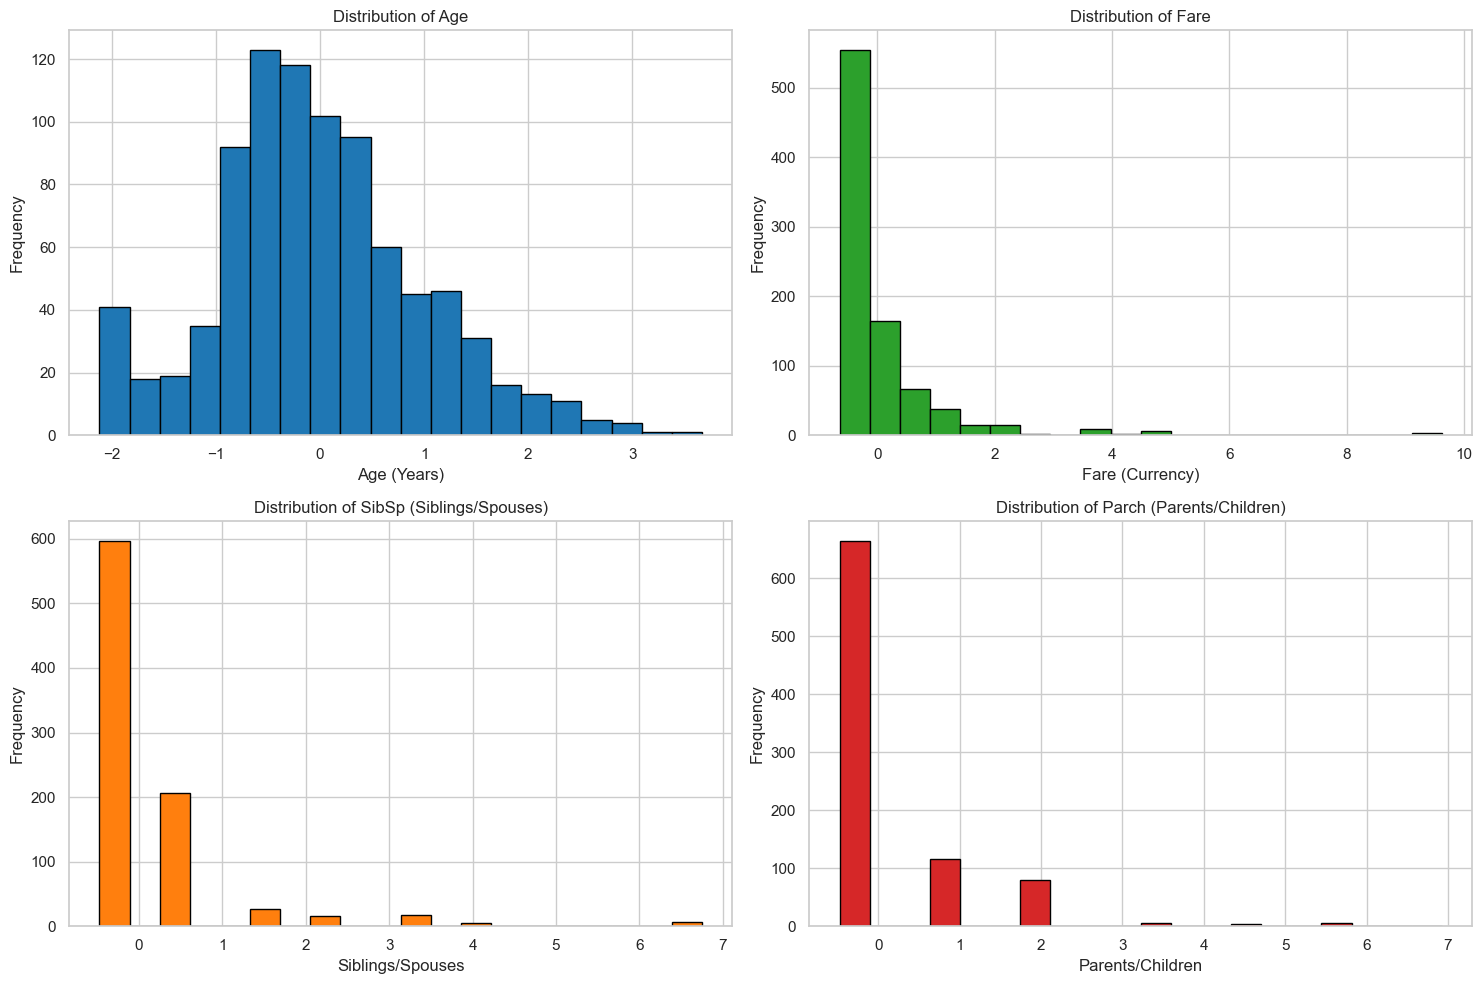

In [107]:
# Lista de características a analizar
features = ['Age', 'Fare', 'SibSp', 'Parch']
# Creación de la figura y ejes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Definir una paleta de colores para un gráfico más estandarizado
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
titles = ['Age', 'Fare', 'SibSp (Siblings/Spouses)', 'Parch (Parents/Children)']
xlabels = ['Age (Years)', 'Fare (Currency)', 'Siblings/Spouses', 'Parents/Children']

# Graficar la distribución para cada característica
for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    ax.hist(train_df[feature], bins=20, color=colors[i], edgecolor='black')
    ax.set_title(f'Distribution of {titles[i]}')
    ax.set_xlabel(xlabels[i])
    ax.set_ylabel('Frequency')

# Ajustar el diseño
plt.tight_layout()
plt.show()

<a id="4.2"></a>
### 4.2 Análisis Bivariado y Multivariado

- **Matriz de correlación**

## Descripción del Código

Se genera una matriz de correlación para las características numéricas del DataFrame `train_df` y la visualiza utilizando un mapa de calor (heatmap). A continuación se detallan los pasos que realiza:

1. **Seleccionar las características numéricas**:
   - Utiliza `train_df.select_dtypes(include=["number"])` para seleccionar todas las columnas numéricas del DataFrame `train_df` y las almacena en `df_numeric`.

2. **Configurar el tamaño de la figura**:
   - Utiliza `plt.figure(figsize=(12,10))` para establecer el tamaño de la figura en 12 pulgadas de ancho y 10 pulgadas de alto.

3. **Calcular la matriz de correlación**:
   - Utiliza `df_numeric.corr()` para calcular la matriz de correlación de las características numéricas seleccionadas. La matriz de correlación muestra la relación lineal entre cada par de características.

4. **Generar el mapa de calor (heatmap)**:
   - Utiliza `sns.heatmap(correlation, annot=True, cmap='coolwarm')` para crear un mapa de calor de la matriz de correlación.
   - La opción `annot=True` añade los valores de correlación en cada celda del mapa de calor.
   - La opción `cmap='coolwarm'` establece el esquema de colores del mapa de calor.

5. **Añadir título y mostrar el gráfico**:
   - Utiliza `plt.title('Matriz de Correlación')` para añadir un título al gráfico.
   - Utiliza `plt.show()` para mostrar el gráfico generado.

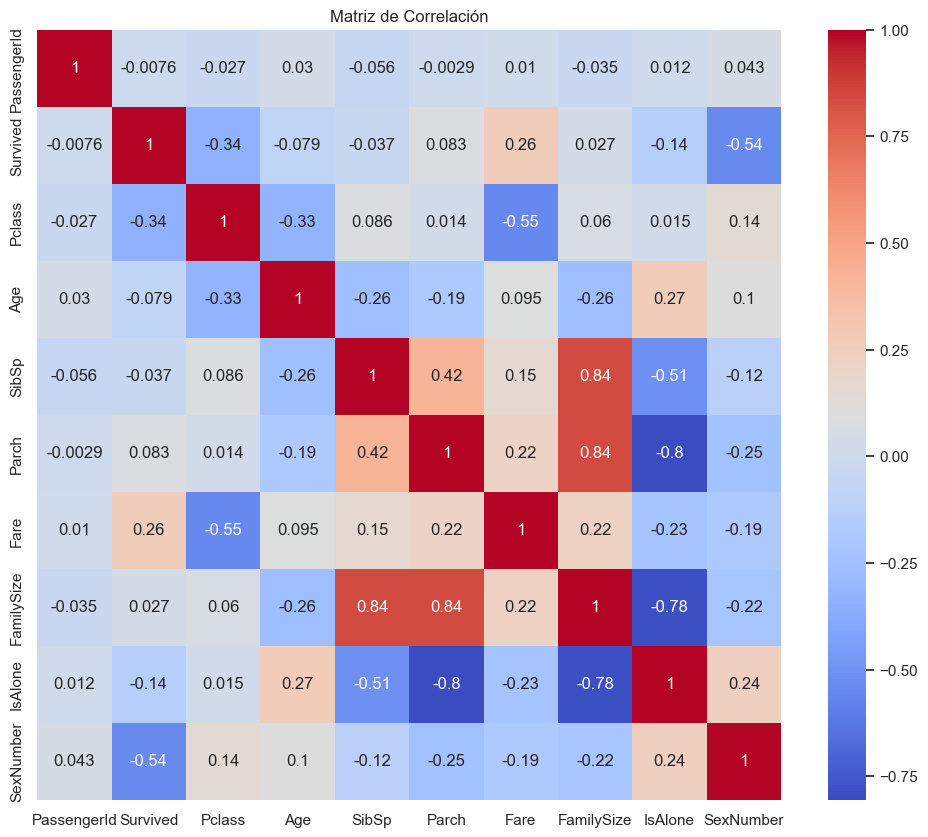

In [108]:
df_numeric = train_df.select_dtypes(include = ["number"])
plt.figure(figsize=(12,10))
correlation =  df_numeric.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

- **Análisis de la correlación entre 'Survived' y 'Fare'**
## Descripción del Código

Se genera un diagrama de caja (boxplot) para analizar la relación entre la variable `Survived` y la variable `Fare` en el DataFrame `train_df`. A continuación se detallan los pasos que realiza:

1. **Configurar el tamaño de la figura**:
   - Utiliza `plt.figure(figsize=(8,6))` para establecer el tamaño de la figura en 8 pulgadas de ancho y 6 pulgadas de alto.

2. **Generar el diagrama de caja (boxplot)**:
   - Utiliza `sns.boxplot(x='Survived', y='Fare', data=train_df)` para crear un diagrama de caja que muestra la distribución de la variable `Fare` para cada categoría de la variable `Survived`.
   - La variable `Survived` se coloca en el eje X y la variable `Fare` en el eje Y.
   - El DataFrame `train_df` se utiliza como fuente de datos.

3. **Añadir título y etiquetas**:
   - Utiliza `plt.title('Relación entre Supervivencia y Fare')` para añadir un título al gráfico.
   - Utiliza `plt.xlabel('Survived')` para etiquetar el eje X.
   - Utiliza `plt.ylabel('Fare')` para etiquetar el eje Y.

4. **Mostrar el gráfico**:
   - Utiliza `plt.show()` para mostrar el gráfico generado.


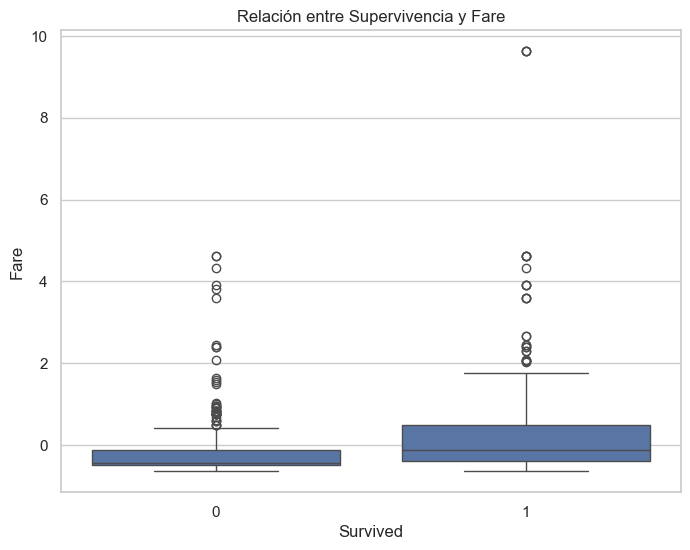

In [109]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.title('Relación entre Supervivencia y Fare')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

<a id="4.3"></a>
### 4.3 Visualizaciones Avanzadas

- **Pairplot de variables seleccionadas**

El análisis con un gráfico de pares (pairplot) es especialmente útil en el contexto de un conjunto de datos como el del Titanic, donde se busca entender las relaciones entre diferentes características y la supervivencia de los pasajeros. A continuación se detallan algunas razones específicas por las que este análisis es valioso:

### 1. **Identificación de Correlaciones**
   - **Relaciones entre Características**: El gráfico de pares permite visualizar cómo se relacionan características como `Age`, `Fare`, `FamilySize`, y `IsAlone` entre sí. Esto puede ayudar a identificar correlaciones que podrían ser importantes para la construcción de modelos predictivos.
   - **Impacto en la Supervivencia**: Al colorear los puntos según la variable `Survived`, puedes observar cómo estas características influyen en la supervivencia. Por ejemplo, podrías notar que los pasajeros con tarifas (`Fare`) más altas tienen una mayor tasa de supervivencia.

### 2. **Distribuciones de Características**
   - **Distribuciones Univariadas**: Los histogramas en la diagonal del gráfico muestran la distribución de cada característica individualmente. Esto es útil para entender la dispersión y la centralidad de variables como `Age` y `Fare`.
   - **Comparación entre Grupos**: Puedes comparar las distribuciones de características entre los pasajeros que sobrevivieron y los que no. Esto puede revelar diferencias significativas que podrían ser explotadas en un modelo predictivo.

### 3. **Detección de Outliers**
   - **Identificación de Valores Atípicos**: Los gráficos de dispersión pueden ayudarte a identificar outliers o valores atípicos en tus datos. Por ejemplo, pasajeros con tarifas extremadamente altas o edades inusuales pueden ser detectados fácilmente.
   - **Impacto de Outliers en la Supervivencia**: Puedes analizar si estos outliers tienen un impacto significativo en la supervivencia, lo cual es crucial para la limpieza y preparación de datos.

### 4. **Guía para la Construcción de Modelos**
   - **Selección de Características**: El análisis puede ayudarte a decidir qué características incluir en tu modelo predictivo. Si ciertas características muestran una fuerte correlación con la supervivencia, podrían ser buenos candidatos para el modelo.
   - **Ingeniería de Características**: Puedes identificar oportunidades para crear nuevas características derivadas que capturen mejor las relaciones observadas en los datos.


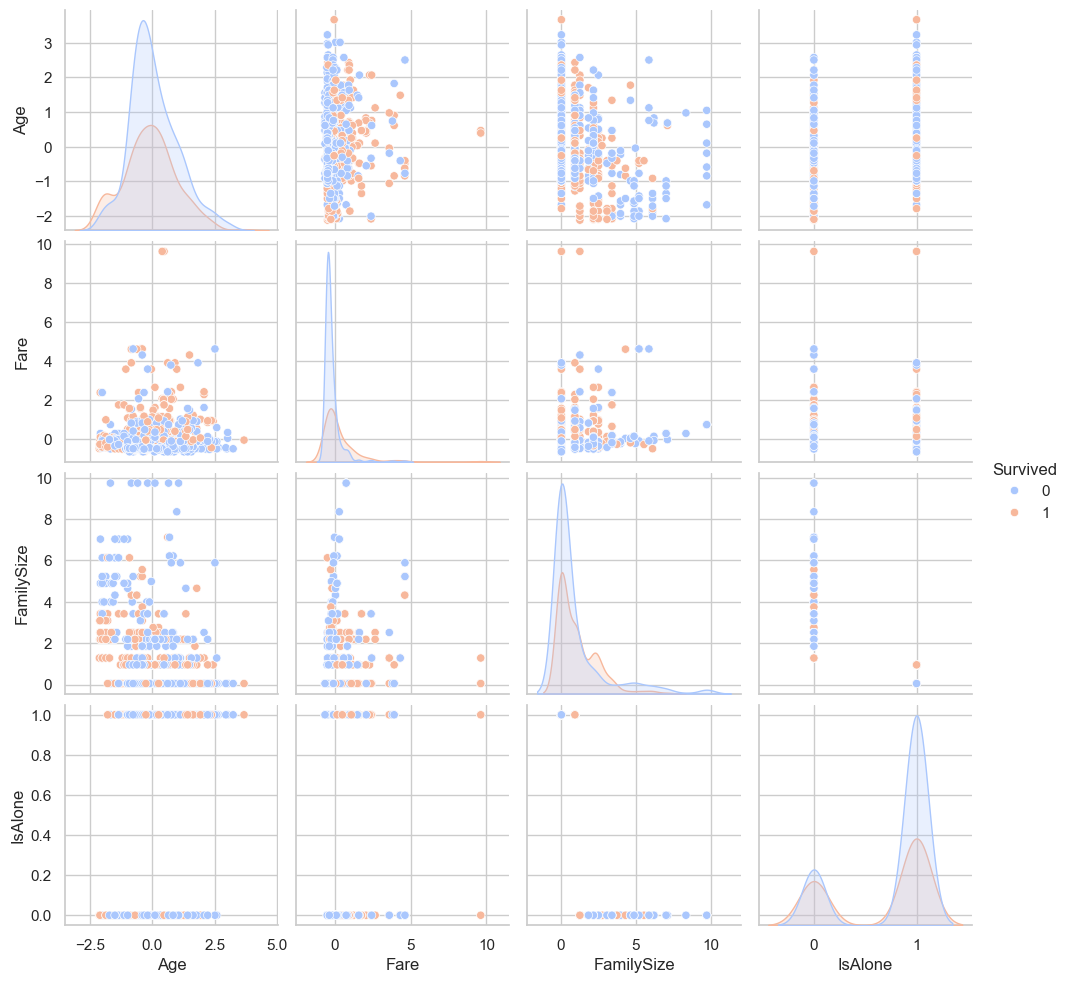

In [110]:
features = ['Survived', 'Age', 'Fare', 'FamilySize', 'IsAlone']
sns.pairplot(train_df[features], hue='Survived', palette='coolwarm')
plt.show()

- **Gráfico de distribución conjunta**

Se  genera un gráfico conjunto (jointplot) para analizar la relación entre las variables `Age` y `Fare` en el DataFrame `train_df`, coloreando los puntos según la variable `Survived`. A continuación se detallan los pasos que realiza:

1. **Generar el gráfico conjunto (jointplot)**:
   - Utiliza `sns.jointplot(x='Age', y='Fare', data=train_df, kind='scatter', hue='Survived')` para crear un gráfico conjunto que muestra la relación entre `Age` y `Fare`.
   - La opción `kind='scatter'` especifica que se debe utilizar un gráfico de dispersión.
   - La opción `hue='Survived'` colorea los puntos en el gráfico según la variable `Survived`, permitiendo visualizar cómo se distribuyen `Age` y `Fare` en función de la supervivencia.

2. **Mostrar el gráfico**:
   - Utiliza `plt.show()` para mostrar el gráfico generado.

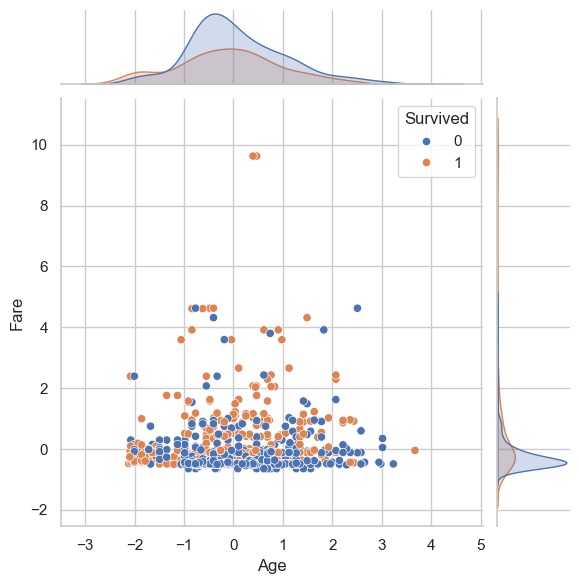

In [111]:
sns.jointplot(x='Age', y='Fare', data=train_df, kind='scatter', hue='Survived')
plt.show()

<a id="5"></a>
## 5. EDA Level 3 — Selección de Características y Reducción de Dimensionalidad

### Objetivos:
- Seleccionar características clave.
- Aplicar técnicas de reducción de dimensionalidad como PCA.

<a id="5.1"></a>
### 5.1 Selección de Características

- **Importancia de características usando Random Forest**
- 
Se entrena un modelo de clasificación utilizando un Random Forest y visualiza la importancia de las características en el DataFrame `train_df`. A continuación se detallan los pasos que realiza:

1. **Importar la Biblioteca Necesaria**:
   - Importa `RandomForestClassifier` de `sklearn.ensemble`.

2. **Definir Variables Predictoras y Objetivo**:
   - Se define `X` como el DataFrame `train_df` excluyendo las columnas `['PassengerId', 'Survived', 'Name', 'Ticket']`.
   - Se define `y` como la columna `Survived` del DataFrame `train_df`, que es la variable objetivo.

3. **Entrenar el Modelo**:
   - Se crea una instancia del modelo `RandomForestClassifier` con 100 árboles (`n_estimators=100`) y una semilla aleatoria (`random_state=42`).
   - Se entrena el modelo utilizando `model.fit(X, y)`.

4. **Obtener Importancias de las Características**:
   - Se obtiene la importancia de cada característica utilizando `model.feature_importances_`.
   - Se crea una serie de pandas `importances` con las importancias de las características, utilizando los nombres de las columnas de `X` como índice.

5. **Visualizar las Importancias**:
   - Se ordenan las importancias y se crea un gráfico de barras horizontales utilizando `importances.sort_values().plot(kind='barh', figsize=(10,6))`.
   - Se añade un título al gráfico con `plt.title('Importancia de Características')`.
   - Se muestra el gráfico con `plt.show()`.

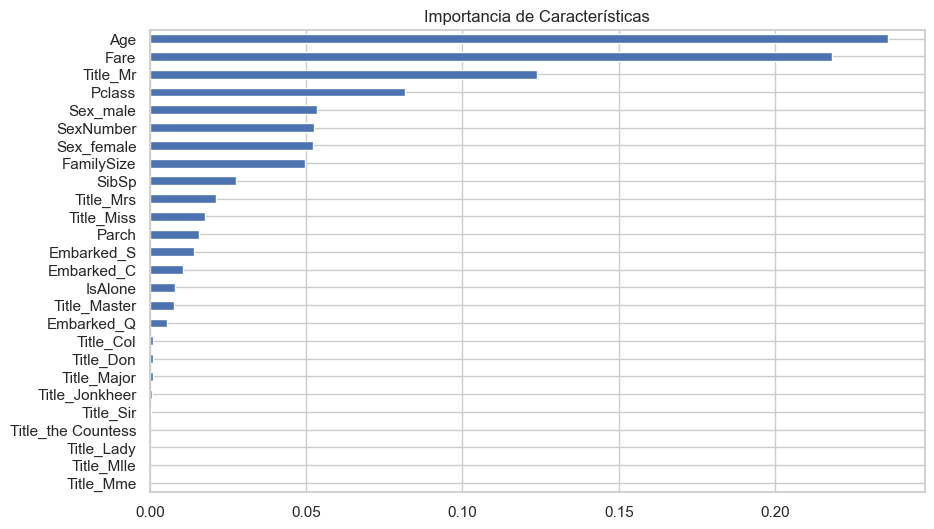

In [112]:
from sklearn.ensemble import RandomForestClassifier

# Definir variables predictoras y objetivo
X = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = train_df['Survived']

# Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Obtener importancias
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Importancia de Características')
plt.show()

<a id="5.2"></a>
### 5.2 Análisis de Componentes Principales (PCA)

Se aplica Análisis de Componentes Principales (PCA) a un conjunto de datos estandarizados y visualiza los componentes principales en un gráfico de dispersión. A continuación se detallan los pasos que realiza:

1. **Importar Bibliotecas Necesarias**:
   - Importa `PCA` de `sklearn.decomposition`.
   - Importa `StandardScaler` de `sklearn.preprocessing`.

2. **Estandarizar los Datos**:
   - Se crea una instancia de `StandardScaler` y se ajusta y transforma `X` para estandarizar las características.
   - Los datos estandarizados se almacenan en `X_scaled`.

3. **Aplicar PCA**:
   - Se crea una instancia de `PCA` con 2 componentes principales (`n_components=2`).
   - Se ajustan y transforman los datos estandarizados `X_scaled` utilizando PCA.
   - Los componentes principales se almacenan en `principal_components`.

4. **Crear un DataFrame con los Componentes Principales**:
   - Se crea un DataFrame `df_pca` con los componentes principales, nombrados `PC1` y `PC2`.
   - Se concatena la columna `Survived` del DataFrame original `train_df` al DataFrame `df_pca`.

5. **Visualizar los Componentes Principales**:
   - Se crea una figura de tamaño 10x6 pulgadas.
   - Se utiliza `sns.scatterplot` para crear un gráfico de dispersión de los componentes principales, coloreando los puntos según la variable `Survived`.
   - Se añade un título al gráfico con `plt.title('PCA de las Variables')`.
   - Se muestra el gráfico con `plt.show()`.


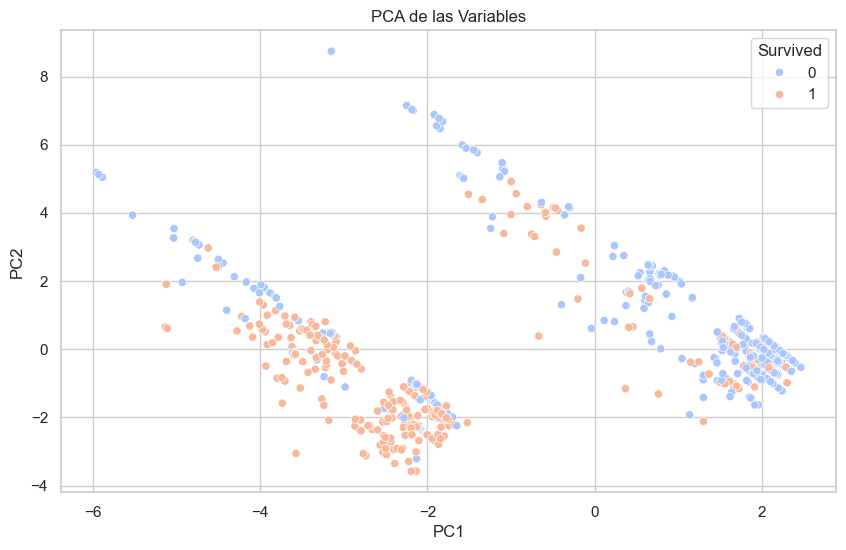

In [113]:
from sklearn.decomposition import PCA

# Estandarizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Crear un dataframe con los componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca = pd.concat([df_pca, train_df[['Survived']].reset_index(drop=True)], axis=1)

# Visualizar los componentes principales
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='Survived', data=df_pca, palette='coolwarm')
plt.title('PCA de las Variables')
plt.show()

<a id="6"></a>
## 6. EDA Level 4 — Insights y Generación de Hipótesis

### Objetivos:
- Identificar patrones clave en los datos.
- Generar hipótesis y extraer conclusiones accionables.

<a id="6.1"></a>
### 6.1 Identificación de Patrones Clave

- **Análisis de supervivencia por género**

Se calcula y visualiza la tasa de supervivencia por género en el DataFrame `train_df`. A continuación se detallan los pasos que realiza:

1. **Calcular la Tasa de Supervivencia por Género**:
   - Se seleccionan las columnas `Sex_male` y `Survived` del DataFrame `train_df`.
   - Se agrupan los datos por la columna `Sex_male` y se calcula la media de la columna `Survived` para cada grupo utilizando `groupby('Sex_male').mean()`.
   - El resultado se almacena en `gender_survival`.

2. **Renombrar los Índices**:
   - Se renombra el índice de `gender_survival` para que `0` se convierta en `Female` y `1` se convierta en `Male`.

3. **Visualizar la Tasa de Supervivencia por Género**:
   - Se crea un gráfico de barras utilizando `gender_survival.plot(kind='bar', figsize=(8,6))`.
   - Se añade un título al gráfico con `plt.title('Tasa de Supervivencia por Género')`.
   - Se añade una etiqueta al eje Y con `plt.ylabel('Survival Rate')`.
   - Se muestra el gráfico con `plt.show()`.

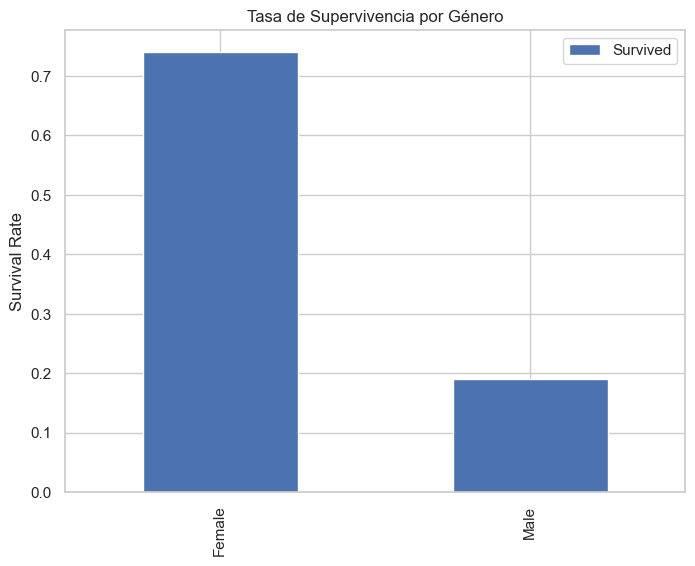

In [114]:
# Porcentaje de supervivientes por género
gender_survival = train_df[['Sex_male', 'Survived']].groupby('Sex_male').mean()
gender_survival.index = ['Female', 'Male']
gender_survival.plot(kind='bar', figsize=(8,6))
plt.title('Tasa de Supervivencia por Género')
plt.ylabel('Survival Rate')
plt.show()

- **Análisis de supervivencia por clase**

Se calcula y visualiza la tasa de supervivencia por clase en el DataFrame `train_df`. A continuación se detallan los pasos que realiza:

1. **Calcular la Tasa de Supervivencia por Clase**:
   - Se seleccionan las columnas `Pclass` y `Survived` del DataFrame `train_df`.
   - Se agrupan los datos por la columna `Pclass` y se calcula la media de la columna `Survived` para cada grupo utilizando `groupby('Pclass').mean()`.
   - El resultado se almacena en `class_survival`.

2. **Visualizar la Tasa de Supervivencia por Clase**:
   - Se crea un gráfico de barras utilizando `class_survival.plot(kind='bar', figsize=(8,6))`.
   - Se añade un título al gráfico con `plt.title('Tasa de Supervivencia por Clase')`.
   - Se añade una etiqueta al eje Y con `plt.ylabel('Survival Rate')`.
   - Se muestra el gráfico con `plt.show()`.

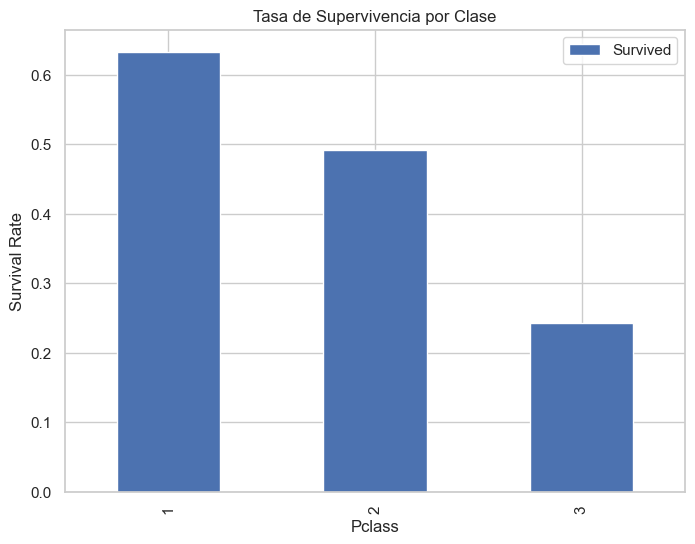

In [115]:
# Porcentaje de supervivientes por clase
class_survival = train_df[['Pclass', 'Survived']].groupby('Pclass').mean()
class_survival.plot(kind='bar', figsize=(8,6))
plt.title('Tasa de Supervivencia por Clase')
plt.ylabel('Survival Rate')
plt.show()

<a id="6.2"></a>
### 6.2 Generación de Hipótesis

- **Hipótesis 1:** Las mujeres tienen una mayor probabilidad de supervivencia que los hombres.
- **Hipótesis 2:** Los pasajeros de primera clase tienen una mayor tasa de supervivencia que los de segunda y tercera clase.
- **Hipótesis 3:** Los pasajeros que viajan solos (IsAlone = 1) tienen una menor tasa de supervivencia.
- **Hipótesis 4:** La edad influye en la supervivencia, con los niños teniendo mayores tasas de supervivencia.

<a id="7"></a>
## 7. Conclusiones

- **Resumen de hallazgos:**
  - Se confirmó que el género y la clase del pasajero son factores importantes en la supervivencia.
  - La creación de nuevas características como 'FamilySize' y 'IsAlone' proporcionó insights adicionales.
  - La aplicación de PCA ayudó a visualizar la distribución de los datos en dos dimensiones.

- **Próximos pasos:**
  - Validar las hipótesis mediante modelos predictivos como regresión logística.
  - Optimizar el modelo utilizando técnicas de validación cruzada y ajuste de hiperparámetros.
  - Implementar estrategias basadas en los insights obtenidos, como priorizar ciertas características en el modelado.

---